In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [2]:
onecall = True  # 8 days
#onecall = False # 5 days

In [3]:

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(base_url).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [4]:

API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
lat, lon = get_location()
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '8 days'
# request data
try:
    print('Requesting json data')
    onecall_data = requests.get(base_url).json()
    #print(onecall_data)
except:
    exit()

Requesting json data


In [5]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = onecall_data['daily']
l = len(df[0])


Creating dataframe:  8 days


In [6]:
_8days = pd.DataFrame.from_records(df)
print('Converting timestamp to human date')
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)            
_8days

Converting timestamp to human date


,dt,sunrise,sunset,moonrise,moonset,moon_phase,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,weather,clouds,pop,rain,uvi
0,18/08,06:48,21:01,20:51,04:23,0.45,"{'day': 22.17, 'min': 14.34, 'max': 24.48, 'ni...","{'day': 21.59, 'night': 19.01, 'eve': 22.49, '...",1015,44,9.42,5.47,311,8.92,"[{'id': 501, 'main': 'Rain', 'description': 'm...",97,1.00,5.04,5.02
1,19/08,06:49,20:59,21:15,05:52,0.50,"{'day': 23.92, 'min': 15.84, 'max': 27.03, 'ni...","{'day': 23.31, 'night': 22.16, 'eve': 26.5, 'm...",1018,36,7.79,2.38,183,5.42,"[{'id': 800, 'main': 'Clear', 'description': '...",7,0.00,NaN,5.81
2,20/08,06:50,20:57,21:34,07:22,0.52,"{'day': 26.33, 'min': 17.81, 'max': 27.09, 'ni...","{'day': 26.33, 'night': 17.76, 'eve': 21.71, '...",1012,33,8.63,5.47,291,11.20,"[{'id': 501, 'main': 'Rain', 'description': 'm...",40,1.00,3.10,5.40
3,21/08,06:52,20:55,21:50,08:49,0.56,"{'day': 21.92, 'min': 14.3, 'max': 23.82, 'nig...","{'day': 21.16, 'night': 18.5, 'eve': 21.77, 'm...",1020,38,6.82,4.10,302,9.33,"[{'id': 803, 'main': 'Clouds', 'description': ...",57,0.00,NaN,4.92
4,22/08,06:53,20:53,22:06,10:16,0.60,"{'day': 25.45, 'min': 16.05, 'max': 27.98, 'ni...","{'day': 24.81, 'night': 22.93, 'eve': 26.27, '...",1011,29,5.97,4.32,222,11.52,"[{'id': 800, 'main': 'Clear', 'description': '...",0,0.00,NaN,6.01
5,23/08,06:55,20:51,22:23,11:42,0.64,"{'day': 22.22, 'min': 17.89, 'max': 24.78, 'ni...","{'day': 22.27, 'night': 22.8, 'eve': 24.88, 'm...",1010,68,15.85,5.59,222,11.60,"[{'id': 804, 'main': 'Clouds', 'description': ...",99,0.00,NaN,7.00
6,24/08,06:56,20:49,22:43,13:08,0.68,"{'day': 23.13, 'min': 17.85, 'max': 25.47, 'ni...","{'day': 22.75, 'night': 21.22, 'eve': 24.07, '...",1017,48,11.38,4.17,221,12.20,"[{'id': 500, 'main': 'Rain', 'description': 'l...",87,0.71,0.51,7.00
7,25/08,06:58,20:47,23:09,14:34,0.72,"{'day': 23.46, 'min': 16.47, 'max': 24.37, 'ni...","{'day': 22.91, 'night': 20.23, 'eve': 22.35, '...",1022,40,8.78,4.25,294,6.14,"[{'id': 802, 'main': 'Clouds', 'description': ...",28,0.00,NaN,7.00


In [7]:
_8days.keys(), len(_8days.keys())

(Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'temp',
        'feels_like', 'pressure', 'humidity', 'dew_point', 'wind_speed',
        'wind_deg', 'wind_gust', 'weather', 'clouds', 'pop', 'rain', 'uvi'],
       dtype='object'),
 19)

In [8]:

print('Selecting columns')
# select multiple column ranges
focus = np.r_[:6, 8:14, 16:l]
focus_idx = _8days.keys()[focus]

status2 = pd.DataFrame(_8days[focus_idx])
demain = status2.loc[1]

demain

Selecting columns


dt            19/08
sunrise       06:49
sunset        20:59
moonrise      21:15
moonset       05:52
moon_phase      0.5
pressure       1018
humidity         36
dew_point      7.79
wind_speed     2.38
wind_deg        183
wind_gust      5.42
pop             0.0
rain            NaN
uvi            5.81
Name: 1, dtype: object

In [9]:
focus

array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 16, 17, 18])

In [10]:
# zip and save
print('Save to CSV')
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv')
#pprint(onecall_data)
print(_8days.iloc[0])  # today


Save to CSV
dt                                                        18/08
sunrise                                                   06:48
sunset                                                    21:01
moonrise                                                  20:51
moonset                                                   04:23
moon_phase                                                 0.45
temp          {'day': 22.17, 'min': 14.34, 'max': 24.48, 'ni...
feels_like    {'day': 21.59, 'night': 19.01, 'eve': 22.49, '...
pressure                                                   1015
humidity                                                     44
dew_point                                                  9.42
wind_speed                                                 5.47
wind_deg                                                    311
wind_gust                                                  8.92
weather       [{'id': 501, 'main': 'Rain', 'description': 'm...
clouds                      

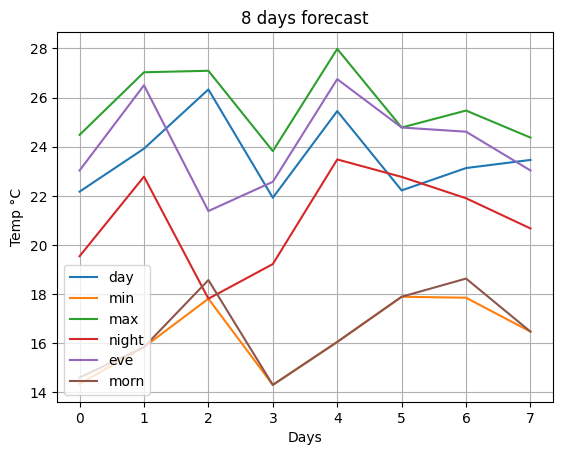

In [11]:
# plot temperature
l = []
for i in range(0,8):
    l.append(_8days.iloc[i].temp)

df = pd.DataFrame(l)
df.plot()
plt.title('8 days forecast')
plt.ylabel('Temp °C')
plt.xlabel('Days')
plt.grid()
plt.show()

   
# 5 days forecast


In [12]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(base_url).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1723971600, 'main': {'temp': 15.95, 'feels_like': 15.74, 'temp_min': 15.95, 'temp_max': 19.3, 'pressure': 1014, 'sea_level': 1014, 'grnd_level': 1005, 'humidity': 82, 'temp_kf': -3.35}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'clouds': {'all': 82}, 'wind': {'speed': 4.22, 'deg': 310, 'gust': 5.73}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-08-18 09:00:00'}, {'dt': 1723982400, 'main': {'temp': 20.22, 'feels_like': 19.81, 'temp_min': 20.22, 'temp_max': 23.19, 'pressure': 1014, 'sea_level': 1014, 'grnd_level': 1005, 'humidity': 58, 'temp_kf': -2.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'clouds': {'all': 88}, 'wind': {'speed': 3.68, 'deg': 313, 'gust': 5.04}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-08-18 12:00:00'}, {'dt': 1723993200, 'main': {'temp': 23.

In [13]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1723971600
main          {'temp': 15.95, 'feels_like': 15.74, 'temp_min...
weather       [{'id': 803, 'main': 'Clouds', 'description': ...
clouds                                              {'all': 82}
wind                  {'speed': 4.22, 'deg': 310, 'gust': 5.73}
visibility                                                10000
pop                                                         0.0
sys                                                {'pod': 'd'}
dt_txt                                      2024-08-18 09:00:00
rain                                                        NaN
Name: 0, dtype: object


In [14]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'sys',
       'dt_txt', 'rain'],
      dtype='object')

In [15]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   18/08 11:00  11:00     19.30     15.95
1   18/08 14:00  14:00     23.19     20.22
2   18/08 17:00  17:00     23.30     23.30
3   18/08 20:00  20:00     22.68     22.68
4   18/08 23:00  23:00     19.54     19.54
5   19/08 02:00  02:00     17.44     17.44
6   19/08 05:00  05:00     16.24     16.24
7   19/08 08:00  08:00     16.19     16.19
8   19/08 11:00  11:00     20.77     20.77
9   19/08 14:00  14:00     25.21     25.21
10  19/08 17:00  17:00     27.03     27.03
11  19/08 20:00  20:00     25.66     25.66
12  19/08 23:00  23:00     22.78     22.78
13  20/08 02:00  02:00     20.82     20.82
14  20/08 05:00  05:00     19.22     19.22
15  20/08 08:00  08:00     19.24     19.24
16  20/08 11:00  11:00     23.62     23.62
17  20/08 14:00  14:00     26.71     26.71
18  20/08 17:00  17:00     22.32     22.32
19  20/08 20:00  20:00     20.09     20.09
20  20/08 23:00  23:00     17.81     17.81
21  21/08 02:00  02:00     15.86     15.86
22  21/08 0

In [16]:
_5days['human_date']

0     18/08 11:00
1     18/08 14:00
2     18/08 17:00
3     18/08 20:00
4     18/08 23:00
5     19/08 02:00
6     19/08 05:00
7     19/08 08:00
8     19/08 11:00
9     19/08 14:00
10    19/08 17:00
11    19/08 20:00
12    19/08 23:00
13    20/08 02:00
14    20/08 05:00
15    20/08 08:00
16    20/08 11:00
17    20/08 14:00
18    20/08 17:00
19    20/08 20:00
20    20/08 23:00
21    21/08 02:00
22    21/08 05:00
23    21/08 08:00
24    21/08 11:00
25    21/08 14:00
26    21/08 17:00
27    21/08 20:00
28    21/08 23:00
29    22/08 02:00
30    22/08 05:00
31    22/08 08:00
32    22/08 11:00
33    22/08 14:00
34    22/08 17:00
35    22/08 20:00
36    22/08 23:00
37    23/08 02:00
38    23/08 05:00
39    23/08 08:00
Name: human_date, dtype: object

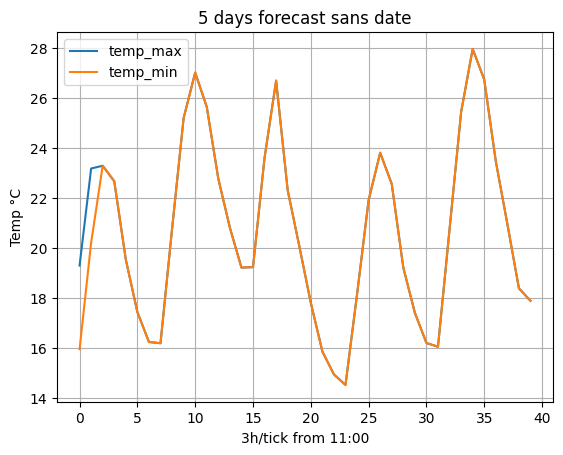

In [21]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast sans date')
plt.ylabel('Temp °C')
plt.xlabel('3h/tick from 11:00')
plt.grid()
plt.show()
    

In [18]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day+hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast avec date')]

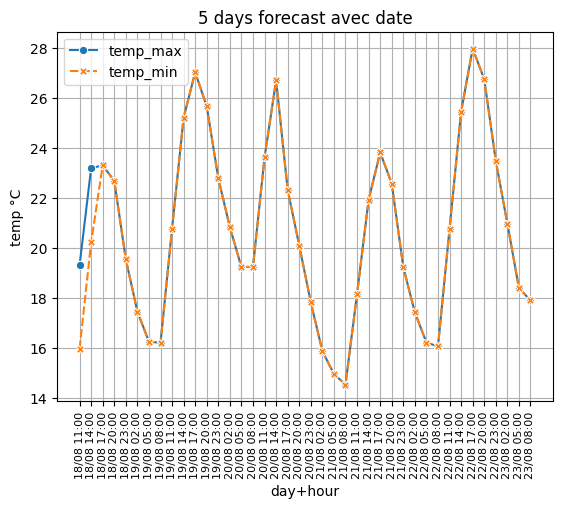

In [23]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 
df1 = df1.set_index('human_date')
df1
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
plt.grid()
ax.set(xlabel='day+hour', ylabel='temp °C', title='5 days forecast avec date') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

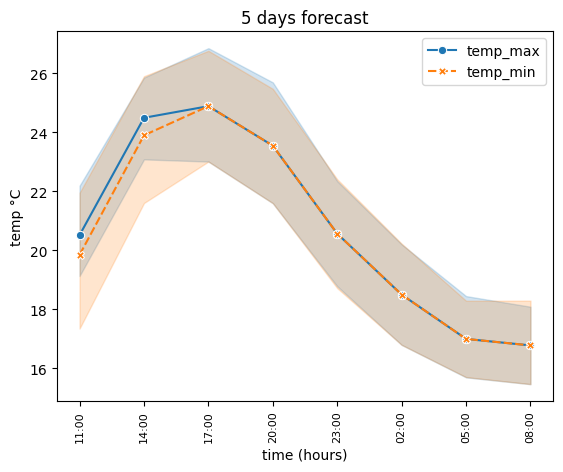

In [20]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 